In [3]:
from google.colab import drive

In [4]:
drive.mount('/gdrive')
%cd /gdrive/MyDrive/entrenamiento/

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive/MyDrive/entrenamiento


In [5]:
import pandas as pd
import numpy as np

In [6]:
dtypes = {
      'key': 'object',
      'fare_amount': 'float64',
      'pickup_datetime': 'object',
      'pickup_longitude': 'float64', 
      'pickup_latitude': 'float64',
      'dropoff_longitude': 'float64',
      'dropoff_latitude': 'float64',
      'passenger_count': 'int64',
      
    
}

df = pd.read_csv("train_data.csv", dtype=dtypes)


In [ ]:
df.head()

,key,pickup_datetime,pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude,passenger_count,fare_amount,day,hour,week,trayecto_nocturno,hora_punta,year,aeropuerto,day_of_month
0,2014-02-19 07:22:00.00000074,2014-02-19 07:22:00 UTC,40.760465,-73.986430,40.737075,-73.988990,1,12.50,2,7.366667,8,0,0,2014,0,19
1,2014-12-06 20:36:22.0000008,2014-12-06 20:36:22 UTC,40.751902,-73.979815,40.755481,-73.979446,1,4.00,5,20.600000,49,1,1,2014,0,6
2,2014-02-19 16:03:00.000000160,2014-02-19 16:03:00 UTC,40.752422,-73.976075,40.759285,-73.981082,1,5.50,2,16.050000,8,0,0,2014,0,19
3,2015-06-21 21:46:34.0000001,2015-06-21 21:46:34 UTC,40.717667,-74.010483,40.660366,-73.985771,1,22.54,6,21.766667,25,1,0,2015,0,21
4,2015-01-11 03:15:38.0000001,2015-01-11 03:15:38 UTC,40.738720,-73.983330,40.847225,-73.933197,1,58.00,6,3.250000,2,1,0,2015,0,11


In [8]:
data = df

## RANDOM FOREST

In [9]:
# Dividimos los datos en entrenamiento y prueba
from sklearn.model_selection import train_test_split
# X son nuestras variables independientes
X = data.drop(["fare_amount","key","pickup_datetime"],axis = 1)
# y es nuestra variable dependiente
y = data['fare_amount'].values

fareTrain, fareTest, ObjTrain, ObjTest = train_test_split(X, y,test_size=0.3, random_state=42)
X.head()


,pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude,passenger_count,day,hour,week,trayecto_nocturno,hora_punta,year,aeropuerto,day_of_month
0,40.760465,-73.986430,40.737075,-73.988990,1,2,7.366667,8,0,0,2014,0,19
1,40.751902,-73.979815,40.755481,-73.979446,1,5,20.600000,49,1,1,2014,0,6
2,40.752422,-73.976075,40.759285,-73.981082,1,2,16.050000,8,0,1,2014,0,19
3,40.717667,-74.010483,40.660366,-73.985771,1,6,21.766667,25,1,0,2015,0,21
4,40.738720,-73.983330,40.847225,-73.933197,1,6,3.250000,2,1,0,2015,0,11


### Entrenamiento con 100 árboles con profundidad máxima de 4



In [ ]:
from sklearn.ensemble import RandomForestRegressor
BA_model = RandomForestRegressor(n_estimators = 100, 
                                  random_state = 1,max_depth = 4,n_jobs = 40)

In [ ]:
BA_model.fit(fareTrain, ObjTrain)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=4, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=40, oob_score=False,
                      random_state=1, verbose=0, warm_start=False)

In [ ]:
from sklearn import metrics

ObjPredcit =BA_model.predict(fareTest)

print("Caracteristicas importantes:\n{}".format(BA_model.feature_importances_))
print("Exactitud:",BA_model.score(fareTest, ObjTest))
print("Exactitud train:",BA_model.score(fareTrain, ObjTrain))
print('Error absoluto medio (MAE):', metrics.mean_absolute_error(ObjTest, ObjPredcit))
print('Error cuadrádico medio (MSE):', metrics.mean_squared_error(ObjTest, ObjPredcit))
print('Raiz cuadrada del error cuadrático medio (RMSE):', metrics.mean_squared_error(ObjTest, ObjPredcit, squared=False))
print('Max Error:', metrics.max_error(ObjTest, ObjPredcit))
print('R^2:', metrics.r2_score(ObjTest, ObjPredcit))
#https://stackoverflow.com/questions/50789508/random-forest-regression-how-do-i-analyse-its-performance-python-sklearn/66209358#66209358

Caracteristicas importantes:
[0.04475723 0.4728418  0.05770888 0.42469209 0.         0.
 0.         0.         0.         0.         0.         0.
 0.        ]
Exactitud: 0.6576034671541504
Exactitud train: 0.6581512604227674
Error absoluto medio (MAE): 4.244709880918928
Error cuadrádico medio (MSE): 36.56794988624143
Raiz cuadrada del error cuadrático medio (RMSE): 6.047143944561054
Max Error: 63.540978557766415
R^2: 0.6576034671541504


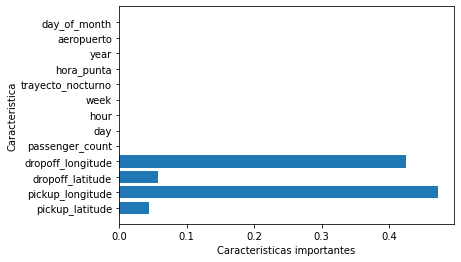

In [ ]:
import matplotlib.pyplot as plt
def dibuja_caracteristicas_importantes(modelo):
    n_caracteristica = X.shape[1]
    plt.barh(range(n_caracteristica), modelo.feature_importances_, align='center')
    plt.yticks(np.arange(n_caracteristica),list(X.columns))
    plt.xlabel("Caracteristicas importantes")
    plt.ylabel("Caracteristica")

dibuja_caracteristicas_importantes(BA_model)

Obtenemos un score de 0.6576 con un RMSE de 6.0471

### Entrenamiento con 100 árboles con profundidad máxima de 4

In [ ]:
from sklearn.ensemble import RandomForestRegressor
BA_model = RandomForestRegressor(n_estimators = 100, 
                                  random_state = 20,max_depth = 4,n_jobs = 40)

In [ ]:
BA_model.fit(fareTrain, ObjTrain)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=4, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=40, oob_score=False,
                      random_state=20, verbose=0, warm_start=False)

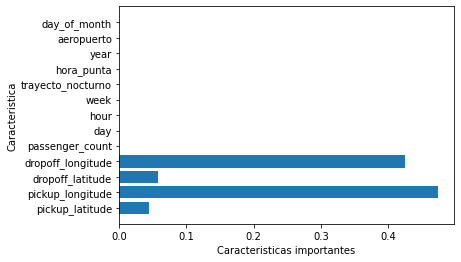

In [ ]:
import matplotlib.pyplot as plt
def dibuja_caracteristicas_importantes(modelo):
    n_caracteristica = X.shape[1]
    plt.barh(range(n_caracteristica), modelo.feature_importances_, align='center')
    plt.yticks(np.arange(n_caracteristica),list(X.columns))
    plt.xlabel("Caracteristicas importantes")
    plt.ylabel("Caracteristica")

dibuja_caracteristicas_importantes(BA_model)

In [ ]:
from sklearn import metrics

ObjPredcit =BA_model.predict(fareTest)

print("Caracteristicas importantes:\n{}".format(BA_model.feature_importances_))
print("Exactitud:",BA_model.score(fareTest, ObjTest))
print("Exactitud train:",BA_model.score(fareTrain, ObjTrain))
print('Error absoluto medio (MAE):', metrics.mean_absolute_error(ObjTest, ObjPredcit))
print('Error cuadrádico medio (MSE):', metrics.mean_squared_error(ObjTest, ObjPredcit))
print('Raiz cuadrada del error cuadrático medio (RMSE):', metrics.mean_squared_error(ObjTest, ObjPredcit, squared=False))
print('Max Error:', metrics.max_error(ObjTest, ObjPredcit))
print('R^2:', metrics.r2_score(ObjTest, ObjPredcit))
#https://stackoverflow.com/questions/50789508/random-forest-regression-how-do-i-analyse-its-performance-python-sklearn/66209358#66209358

Caracteristicas importantes:
[0.04367136 0.47384705 0.05767026 0.42481133 0.         0.
 0.         0.         0.         0.         0.         0.
 0.        ]
Exactitud: 0.6577215903537232
Exactitud train: 0.6582705844217462
Error absoluto medio (MAE): 4.244122752758732
Error cuadrádico medio (MSE): 36.555334328465534
Raiz cuadrada del error cuadrático medio (RMSE): 6.046100754078246
Max Error: 63.5408809518966
R^2: 0.6577215903537232


Obtenemos un score de 0.6577 con un RMSE de 6.0461

In [ ]:
from sklearn.ensemble import RandomForestRegressor
BA_model = RandomForestRegressor(n_estimators = 100, 
                                  random_state = 40,max_depth = 4,criterion = "mae",n_jobs = 40)

### Entrenamiento con 100 árboles con profundidad máxima de 8

In [ ]:
from sklearn.ensemble import RandomForestRegressor
BA_model = RandomForestRegressor(n_estimators = 100, 
                                  random_state = 1,max_depth = 8,n_jobs = 40,oob_score = True)

In [ ]:
BA_model.fit(fareTrain, ObjTrain)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=8, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=40, oob_score=True,
                      random_state=1, verbose=0, warm_start=False)

In [ ]:
from sklearn import metrics

ObjPredcit =BA_model.predict(fareTest)

print("Caracteristicas importantes:\n{}".format(BA_model.feature_importances_))
print("Exactitud:",BA_model.score(fareTest, ObjTest))
print("Exactitud train:",BA_model.score(fareTrain, ObjTrain))
print('Error absoluto medio (MAE):', metrics.mean_absolute_error(ObjTest, ObjPredcit))
print('Error cuadrádico medio (MSE):', metrics.mean_squared_error(ObjTest, ObjPredcit))
print('Raiz cuadrada del error cuadrático medio (RMSE):', metrics.mean_squared_error(ObjTest, ObjPredcit, squared=False))
print('Max Error:', metrics.max_error(ObjTest, ObjPredcit))
print('R^2:', metrics.r2_score(ObjTest, ObjPredcit))
#https://stackoverflow.com/questions/50789508/random-forest-regression-how-do-i-analyse-its-performance-python-sklearn/66209358#66209358

Caracteristicas importantes:
[7.44286710e-02 4.27433589e-01 9.57290665e-02 4.00694155e-01
 3.34017145e-06 4.06098811e-06 6.03237905e-05 3.22769132e-05
 1.49996020e-03 5.52185885e-07 6.31462509e-06 9.70307537e-05
 1.06594411e-05]
Exactitud: 0.7641824928035956
Exactitud train: 0.7649131122490865
Error absoluto medio (MAE): 3.555422330557685
Error cuadrádico medio (MSE): 25.185309891379124
Raiz cuadrada del error cuadrático medio (RMSE): 5.018496776065431
Max Error: 65.79212666686581
R^2: 0.7641824928035956


In [ ]:
import matplotlib.pyplot as plt
def dibuja_caracteristicas_importantes(modelo):
    n_caracteristica = X.shape[1]
    plt.barh(range(n_caracteristica), modelo.feature_importances_, align='center')
    plt.yticks(np.arange(n_caracteristica),list(X.columns))
    plt.xlabel("Caracteristicas importantes")
    plt.ylabel("Caracteristica")

dibuja_caracteristicas_importantes(BA_model)

Obtenemos un score de 0.76418 con un RMSE de 5.018

### Entrenamiento con 100 árboles con profundidad máxima de 10

In [10]:
from sklearn.ensemble import RandomForestRegressor
BA_model = RandomForestRegressor(n_estimators = 100, 
                                  random_state = 15,max_depth = 10,n_jobs = 40)

In [11]:
BA_model.fit(fareTrain, ObjTrain)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=10, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=40, oob_score=False,
                      random_state=15, verbose=0, warm_start=False)

In [12]:
from sklearn import metrics

ObjPredcit =BA_model.predict(fareTest)

print("Caracteristicas importantes:\n{}".format(BA_model.feature_importances_))
print("Exactitud:",BA_model.score(fareTest, ObjTest))
print("Exactitud train:",BA_model.score(fareTrain, ObjTrain))
print('Error absoluto medio (MAE):', metrics.mean_absolute_error(ObjTest, ObjPredcit))
print('Error cuadrádico medio (MSE):', metrics.mean_squared_error(ObjTest, ObjPredcit))
print('Raiz cuadrada del error cuadrático medio (RMSE):', metrics.mean_squared_error(ObjTest, ObjPredcit, squared=False))
print('Max Error:', metrics.max_error(ObjTest, ObjPredcit))
print('R^2:', metrics.r2_score(ObjTest, ObjPredcit))
#https://stackoverflow.com/questions/50789508/random-forest-regression-how-do-i-analyse-its-performance-python-sklearn/66209358#66209358

Caracteristicas importantes:
[8.05920754e-02 4.17766932e-01 1.08534114e-01 3.90722212e-01
 4.16635523e-05 1.21185767e-04 3.32415002e-04 1.06849693e-04
 1.56640911e-03 7.90778692e-06 4.74456821e-05 1.06585376e-04
 5.42048618e-05]
Exactitud: 0.7933982918826932
Exactitud train: 0.7952404603151061
Error absoluto medio (MAE): 3.2698887032668953
Error cuadrádico medio (MSE): 22.065062534517235
Raiz cuadrada del error cuadrático medio (RMSE): 4.697346328994407
Max Error: 65.53783799750852
R^2: 0.7933982918826932


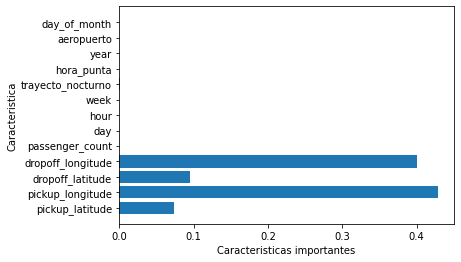

In [12]:
import matplotlib.pyplot as plt
def dibuja_caracteristicas_importantes(modelo):
    n_caracteristica = X.shape[1]
    plt.barh(range(n_caracteristica), modelo.feature_importances_, align='center')
    plt.yticks(np.arange(n_caracteristica),list(X.columns))
    plt.xlabel("Caracteristicas importantes")
    plt.ylabel("Caracteristica")

dibuja_caracteristicas_importantes(BA_model)

### Entrenamiento con 200 árboles con profundidad máxima de 10

In [22]:
from sklearn.ensemble import RandomForestRegressor
BA_model = RandomForestRegressor(n_estimators = 200, 
                                  random_state = 10,max_depth = 10,n_jobs = 40)

In [23]:
BA_model.fit(fareTrain, ObjTrain)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=10, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=200, n_jobs=40, oob_score=False,
                      random_state=10, verbose=0, warm_start=False)

In [24]:
from sklearn import metrics

ObjPredcit =BA_model.predict(fareTest)

print("Caracteristicas importantes:\n{}".format(BA_model.feature_importances_))
print("Exactitud:",BA_model.score(fareTest, ObjTest))
print("Exactitud train:",BA_model.score(fareTrain, ObjTrain))
print('Error absoluto medio (MAE):', metrics.mean_absolute_error(ObjTest, ObjPredcit))
print('Error cuadrádico medio (MSE):', metrics.mean_squared_error(ObjTest, ObjPredcit))
print('Raiz cuadrada del error cuadrático medio (RMSE):', metrics.mean_squared_error(ObjTest, ObjPredcit, squared=False))
print('Max Error:', metrics.max_error(ObjTest, ObjPredcit))
print('R^2:', metrics.r2_score(ObjTest, ObjPredcit))
#https://stackoverflow.com/questions/50789508/random-forest-regression-how-do-i-analyse-its-performance-python-sklearn/66209358#66209358

Caracteristicas importantes:
[8.01400621e-02 4.18157359e-01 1.08594775e-01 3.90722922e-01
 4.10902674e-05 1.17627955e-04 3.52334776e-04 1.02891908e-04
 1.56155146e-03 6.98962529e-06 4.52747410e-05 1.00463702e-04
 5.66574316e-05]
Exactitud: 0.7934026947861079
Exactitud train: 0.7952601910059117
Error absoluto medio (MAE): 3.26972042832052
Error cuadrádico medio (MSE): 22.06459230443024
Raiz cuadrada del error cuadrático medio (RMSE): 4.697296275990076
Max Error: 65.70385629035012
R^2: 0.7934026947861079


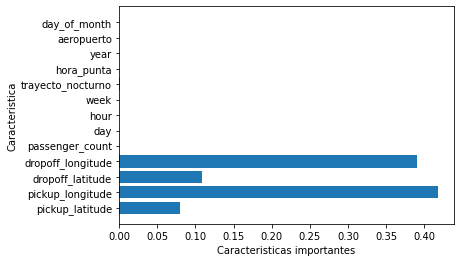

In [25]:
import matplotlib.pyplot as plt
def dibuja_caracteristicas_importantes(modelo):
    n_caracteristica = X.shape[1]
    plt.barh(range(n_caracteristica), modelo.feature_importances_, align='center')
    plt.yticks(np.arange(n_caracteristica),list(X.columns))
    plt.xlabel("Caracteristicas importantes")
    plt.ylabel("Caracteristica")

dibuja_caracteristicas_importantes(BA_model)

### Entrenamiento con 500 árboles con profundidad máxima de 10

In [30]:
from sklearn.ensemble import RandomForestRegressor
BA_model = RandomForestRegressor(n_estimators = 500, 
                                  random_state = 10,max_depth = 10,n_jobs = 40)

In [31]:
BA_model.fit(fareTrain, ObjTrain)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=10, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=500, n_jobs=40, oob_score=False,
                      random_state=10, verbose=0, warm_start=False)

In [32]:
from sklearn import metrics

ObjPredcit =BA_model.predict(fareTest)

print("Caracteristicas importantes:\n{}".format(BA_model.feature_importances_))
print("Exactitud:",BA_model.score(fareTest, ObjTest))
print("Exactitud train:",BA_model.score(fareTrain, ObjTrain))
print('Error absoluto medio (MAE):', metrics.mean_absolute_error(ObjTest, ObjPredcit))
print('Error cuadrádico medio (MSE):', metrics.mean_squared_error(ObjTest, ObjPredcit))
print('Raiz cuadrada del error cuadrático medio (RMSE):', metrics.mean_squared_error(ObjTest, ObjPredcit, squared=False))
print('Max Error:', metrics.max_error(ObjTest, ObjPredcit))
print('R^2:', metrics.r2_score(ObjTest, ObjPredcit))
#https://stackoverflow.com/questions/50789508/random-forest-regression-how-do-i-analyse-its-performance-python-sklearn/66209358#66209358

Caracteristicas importantes:
[8.05817302e-02 4.17693898e-01 1.08588317e-01 3.90756912e-01
 3.90408981e-05 1.20027490e-04 3.49441491e-04 1.03321968e-04
 1.55839917e-03 6.58369013e-06 4.46755051e-05 1.03029339e-04
 5.46220562e-05]
Exactitud: 0.7934222649008105
Exactitud train: 0.7952772450838179
Error absoluto medio (MAE): 3.269603171896328
Error cuadrádico medio (MSE): 22.062502216169825
Raiz cuadrada del error cuadrático medio (RMSE): 4.697073792923614
Max Error: 65.70566816014455
R^2: 0.7934222649008105


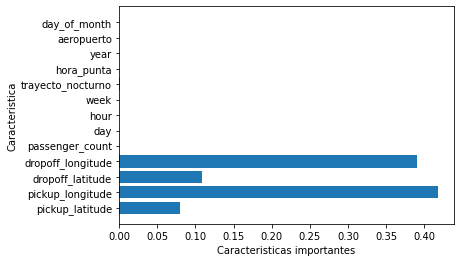

In [ ]:
import matplotlib.pyplot as plt
def dibuja_caracteristicas_importantes(modelo):
    n_caracteristica = X.shape[1]
    plt.barh(range(n_caracteristica), modelo.feature_importances_, align='center')
    plt.yticks(np.arange(n_caracteristica),list(X.columns))
    plt.xlabel("Caracteristicas importantes")
    plt.ylabel("Caracteristica")

dibuja_caracteristicas_importantes(BA_model)

### Entrenamiento con 100 árboles con profundidad máxima de 12

In [26]:
from sklearn.ensemble import RandomForestRegressor
BA_model = RandomForestRegressor(n_estimators = 100, 
                                  random_state = 10,max_depth = 12,n_jobs = 40)

In [27]:
BA_model.fit(fareTrain, ObjTrain)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=12, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=40, oob_score=False,
                      random_state=10, verbose=0, warm_start=False)

In [28]:
from sklearn import metrics

ObjPredcit =BA_model.predict(fareTest)

print("Caracteristicas importantes:\n{}".format(BA_model.feature_importances_))
print("Exactitud:",BA_model.score(fareTest, ObjTest))
print("Exactitud train:",BA_model.score(fareTrain, ObjTrain))
print('Error absoluto medio (MAE):', metrics.mean_absolute_error(ObjTest, ObjPredcit))
print('Error cuadrádico medio (MSE):', metrics.mean_squared_error(ObjTest, ObjPredcit))
print('Raiz cuadrada del error cuadrático medio (RMSE):', metrics.mean_squared_error(ObjTest, ObjPredcit, squared=False))
print('Max Error:', metrics.max_error(ObjTest, ObjPredcit))
print('R^2:', metrics.r2_score(ObjTest, ObjPredcit))
#https://stackoverflow.com/questions/50789508/random-forest-regression-how-do-i-analyse-its-performance-python-sklearn/66209358#66209358

Caracteristicas importantes:
[8.45171110e-02 4.12626593e-01 1.14076665e-01 3.84775591e-01
 1.03001750e-04 2.81787662e-04 8.69880500e-04 2.96921358e-04
 2.05199893e-03 2.21019449e-05 7.84385883e-05 1.14998511e-04
 1.84911098e-04]
Exactitud: 0.8088695995463278
Exactitud train: 0.812584227055627
Error absoluto medio (MAE): 3.1137480106496
Error cuadrádico medio (MSE): 20.412726867984297
Raiz cuadrada del error cuadrático medio (RMSE): 4.5180445845503
Max Error: 65.91500792911579
R^2: 0.8088695995463278


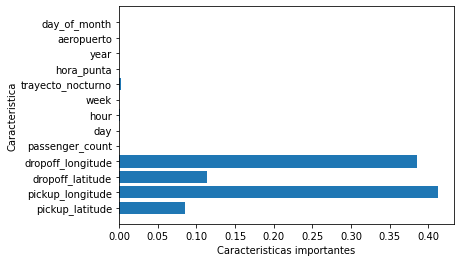

In [29]:
import matplotlib.pyplot as plt
def dibuja_caracteristicas_importantes(modelo):
    n_caracteristica = X.shape[1]
    plt.barh(range(n_caracteristica), modelo.feature_importances_, align='center')
    plt.yticks(np.arange(n_caracteristica),list(X.columns))
    plt.xlabel("Caracteristicas importantes")
    plt.ylabel("Caracteristica")

dibuja_caracteristicas_importantes(BA_model)

### Entrenamiento con 100 árboles con profundidad máxima de 8 y min_samples_leaf = 2

In [17]:
from sklearn.ensemble import RandomForestRegressor
BA_model = RandomForestRegressor(n_estimators = 100, 
                                  random_state = 10,max_depth = 8,min_samples_leaf = 2,n_jobs = 40)

In [18]:
BA_model.fit(fareTrain, ObjTrain)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=8, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=2,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=40, oob_score=False,
                      random_state=10, verbose=0, warm_start=False)

In [19]:
from sklearn import metrics

ObjPredcit =BA_model.predict(fareTest)

print("Caracteristicas importantes:\n{}".format(BA_model.feature_importances_))
print("Exactitud:",BA_model.score(fareTest, ObjTest))
print("Exactitud train:",BA_model.score(fareTrain, ObjTrain))
print('Error absoluto medio (MAE):', metrics.mean_absolute_error(ObjTest, ObjPredcit))
print('Error cuadrádico medio (MSE):', metrics.mean_squared_error(ObjTest, ObjPredcit))
print('Raiz cuadrada del error cuadrático medio (RMSE):', metrics.mean_squared_error(ObjTest, ObjPredcit, squared=False))
print('Max Error:', metrics.max_error(ObjTest, ObjPredcit))
print('R^2:', metrics.r2_score(ObjTest, ObjPredcit))
#https://stackoverflow.com/questions/50789508/random-forest-regression-how-do-i-analyse-its-performance-python-sklearn/66209358#66209358

Caracteristicas importantes:
[7.14532751e-02 4.30491457e-01 9.57681671e-02 4.00555541e-01
 3.76211067e-06 3.73285913e-06 6.15830326e-05 3.24643201e-05
 1.52319387e-03 8.31667309e-07 3.76385154e-06 9.10250723e-05
 1.12036812e-05]
Exactitud: 0.7642654431281367
Exactitud train: 0.7650005557185694
Error absoluto medio (MAE): 3.554536411504769
Error cuadrádico medio (MSE): 25.176450796674935
Raiz cuadrada del error cuadrático medio (RMSE): 5.017614054177038
Max Error: 65.8463694219745
R^2: 0.7642654431281367


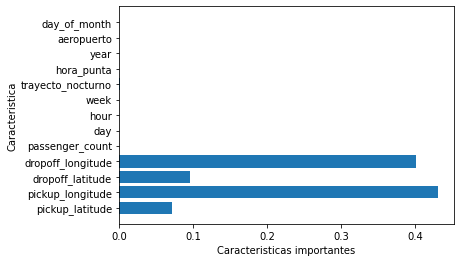

In [20]:
import matplotlib.pyplot as plt
def dibuja_caracteristicas_importantes(modelo):
    n_caracteristica = X.shape[1]
    plt.barh(range(n_caracteristica), modelo.feature_importances_, align='center')
    plt.yticks(np.arange(n_caracteristica),list(X.columns))
    plt.xlabel("Caracteristicas importantes")
    plt.ylabel("Caracteristica")

dibuja_caracteristicas_importantes(BA_model)

In [13]:
from sklearn.ensemble import RandomForestRegressor
BA_model = RandomForestRegressor(n_estimators = 100, 
                                  random_state = 10,max_depth = 12,n_jobs = 40)

In [14]:
BA_model.fit(fareTrain, ObjTrain)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=12, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=40, oob_score=False,
                      random_state=10, verbose=0, warm_start=False)

In [15]:
from sklearn import metrics

ObjPredcit =BA_model.predict(fareTest)

print("Caracteristicas importantes:\n{}".format(BA_model.feature_importances_))
print("Exactitud:",BA_model.score(fareTest, ObjTest))
print("Exactitud train:",BA_model.score(fareTrain, ObjTrain))
print('Error absoluto medio (MAE):', metrics.mean_absolute_error(ObjTest, ObjPredcit))
print('Error cuadrádico medio (MSE):', metrics.mean_squared_error(ObjTest, ObjPredcit))
print('Raiz cuadrada del error cuadrático medio (RMSE):', metrics.mean_squared_error(ObjTest, ObjPredcit, squared=False))
print('Max Error:', metrics.max_error(ObjTest, ObjPredcit))
print('R^2:', metrics.r2_score(ObjTest, ObjPredcit))
#https://stackoverflow.com/questions/50789508/random-forest-regression-how-do-i-analyse-its-performance-python-sklearn/66209358#66209358

Caracteristicas importantes:
[8.45171110e-02 4.12626593e-01 1.14076665e-01 3.84775591e-01
 1.03001750e-04 2.81787662e-04 8.69880500e-04 2.96921358e-04
 2.05199893e-03 2.21019449e-05 7.84385883e-05 1.14998511e-04
 1.84911098e-04]
Exactitud: 0.8088695995463278
Exactitud train: 0.812584227055627
Error absoluto medio (MAE): 3.1137480106496
Error cuadrádico medio (MSE): 20.412726867984297
Raiz cuadrada del error cuadrático medio (RMSE): 4.5180445845503
Max Error: 65.9150079291158
R^2: 0.8088695995463278


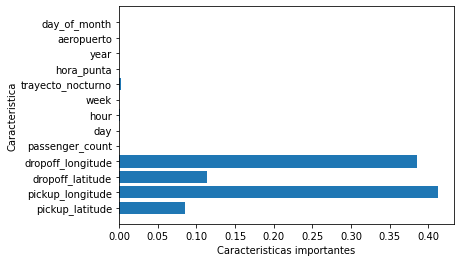

In [16]:
import matplotlib.pyplot as plt
def dibuja_caracteristicas_importantes(modelo):
    n_caracteristica = X.shape[1]
    plt.barh(range(n_caracteristica), modelo.feature_importances_, align='center')
    plt.yticks(np.arange(n_caracteristica),list(X.columns))
    plt.xlabel("Caracteristicas importantes")
    plt.ylabel("Caracteristica")

dibuja_caracteristicas_importantes(BA_model)

### Entrenamiento con 200 árboles con profundidad máxima de 8

In [ ]:
from sklearn.ensemble import RandomForestRegressor
BA_model = RandomForestRegressor(n_estimators = 200, 
                                  random_state = 1,max_depth = 8,n_jobs = 40,oob_score = True)

In [ ]:
BA_model.fit(fareTrain, ObjTrain)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=8, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=200, n_jobs=40, oob_score=True,
                      random_state=1, verbose=0, warm_start=False)

In [ ]:
from sklearn import metrics

ObjPredcit =BA_model.predict(fareTest)

print("Caracteristicas importantes:\n{}".format(BA_model.feature_importances_))
print("Exactitud:",BA_model.score(fareTest, ObjTest))
print("Exactitud train:",BA_model.score(fareTrain, ObjTrain))
print('Error absoluto medio (MAE):', metrics.mean_absolute_error(ObjTest, ObjPredcit))
print('Error cuadrádico medio (MSE):', metrics.mean_squared_error(ObjTest, ObjPredcit))
print('Raiz cuadrada del error cuadrático medio (RMSE):', metrics.mean_squared_error(ObjTest, ObjPredcit, squared=False))
print('Max Error:', metrics.max_error(ObjTest, ObjPredcit))
print('R^2:', metrics.r2_score(ObjTest, ObjPredcit))
#https://stackoverflow.com/questions/50789508/random-forest-regression-how-do-i-analyse-its-performance-python-sklearn/66209358#66209358

Caracteristicas importantes:
[7.35603884e-02 4.28295291e-01 9.56806615e-02 4.00733101e-01
 3.34263124e-06 4.79324896e-06 5.90902971e-05 3.31927583e-05
 1.51607418e-03 6.91802645e-07 5.35872151e-06 9.69116719e-05
 1.11029842e-05]
Exactitud: 0.764203884768057
Exactitud train: 0.7649322964082861
Error absoluto medio (MAE): 3.5550954324193604
Error cuadrádico medio (MSE): 25.183025229563505
Raiz cuadrada del error cuadrático medio (RMSE): 5.018269146783929
Max Error: 65.80331071461451
R^2: 0.764203884768057


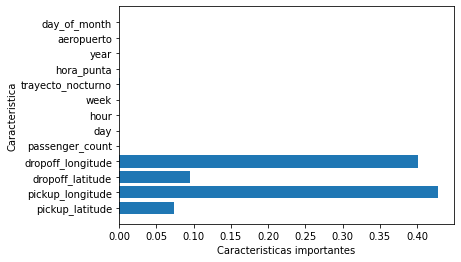

In [ ]:
import matplotlib.pyplot as plt
def dibuja_caracteristicas_importantes(modelo):
    n_caracteristica = X.shape[1]
    plt.barh(range(n_caracteristica), modelo.feature_importances_, align='center')
    plt.yticks(np.arange(n_caracteristica),list(X.columns))
    plt.xlabel("Caracteristicas importantes")
    plt.ylabel("Caracteristica")

dibuja_caracteristicas_importantes(BA_model)

Obtenemos un score de 0.76420 con un RMSE de 5.018

### Entrenamiento con 500 árboles con profundidad máxima de 8

In [ ]:
from sklearn.ensemble import RandomForestRegressor
BA_model = RandomForestRegressor(n_estimators = 500, 
                                  random_state = 1,max_depth = 8,n_jobs = 40,oob_score = True)

In [ ]:
BA_model.fit(fareTrain, ObjTrain)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=8, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=500, n_jobs=40, oob_score=True,
                      random_state=1, verbose=0, warm_start=False)

In [ ]:
from sklearn import metrics

ObjPredcit =BA_model.predict(fareTest)
BA_model.score(fareTest, ObjTest)
BA_model.score(fareTrain, ObjTrain)
print("Caracteristicas importantes:\n{}".format(BA_model.feature_importances_))
print("Exactitud:",BA_model.score(fareTest, ObjTest))
print("Exactitud train:",BA_model.score(fareTrain, ObjTrain))
print("Exactitud media para 1000 árboles y sin max_depth:",BA_model.score(fareTest, ObjTest))

print('Error absoluto medio (MAE):', metrics.mean_absolute_error(ObjTest, ObjPredcit))
print('Error cuadrádico medio (MSE):', metrics.mean_squared_error(ObjTest, ObjPredcit))
print('Raiz cuadrada del error cuadrático medio (RMSE):', metrics.mean_squared_error(ObjTest, ObjPredcit, squared=False))
#print('Mean Absolute Percentage Error (MAPE):', metrics.mean_absolute_percentage_error(ObjTest, ObjPredcit))
print('Explained Variance Score:', metrics.explained_variance_score(ObjTest, ObjPredcit))
print('Max Error:', metrics.max_error(ObjTest, ObjPredcit))
print('Mean Squared Log Error:', metrics.mean_squared_log_error(ObjTest, ObjPredcit))
print('Median Absolute Error:', metrics.median_absolute_error(ObjTest, ObjPredcit))
print('R^2:', metrics.r2_score(ObjTest, ObjPredcit))
print('Mean Poisson Deviance:', metrics.mean_poisson_deviance(ObjTest, ObjPredcit))
print('Mean Gamma Deviance:', metrics.mean_gamma_deviance(ObjTest, ObjPredcit))
#https://stackoverflow.com/questions/50789508/random-forest-regression-how-do-i-analyse-its-performance-python-sklearn/66209358#66209358

Caracteristicas importantes:
[7.29234309e-02 4.29174545e-01 9.62013019e-02 4.00821202e-01
 2.43364203e-06 5.10194614e-06 8.26389101e-04 3.17928403e-05
 5.17878137e-06 8.62325653e-06]
Exactitud: 0.7641729526816465
Exactitud train: 0.764928037402892
Exactitud media para 1000 árboles y sin max_depth: 0.7641729526816465
Error absoluto medio (MAE): 3.555044147386784
Error cuadrádico medio (MSE): 25.186328776408246
Raiz cuadrada del error cuadrático medio (RMSE): 5.018598288009137
Explained Variance Score: 0.7641729674345832
Max Error: 65.79053804142409
Mean Squared Log Error: 0.15051684222335354
Median Absolute Error: 2.8356482506639935
R^2: 0.7641729526816465
Mean Poisson Deviance: 1.9380195601457966
Mean Gamma Deviance: 0.18399500155429604


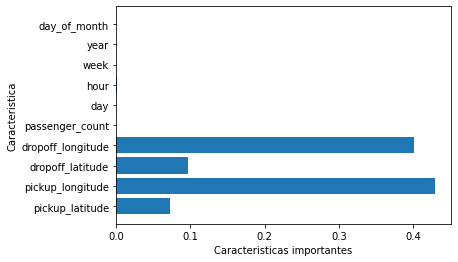

In [ ]:
import matplotlib.pyplot as plt
def dibuja_caracteristicas_importantes(modelo):
    n_caracteristica = X.shape[1]
    plt.barh(range(n_caracteristica), modelo.feature_importances_, align='center')
    plt.yticks(np.arange(n_caracteristica),list(X.columns))
    plt.xlabel("Caracteristicas importantes")
    plt.ylabel("Caracteristica")

dibuja_caracteristicas_importantes(BA_model)

Obtenemos un score de 0.76417 con un RMSE de 5.018

## CONCLUSIONES

* Al ver los resultados notammos que la variación de la profundidad máxima del árbol tiene un efecto significativo sobre el Score, este aumenta de 0.6577 (profundidad máxima de 4) a 0.8088 (profundidad máxima de 12).
* Al aumentar la profundidad del árbol el modelo se va sobreajustando a la data de entrenamiento. Para una profundidad de 8 casi no vemos sobreajuste en el modelo ( el Score para la data de test es 0.76420 mientras para la data de entrenamiento es 0.764932). Para una profundidad de 10 el modelo está sobreajustado un poco más: el Score de la data de test es 79340 y el Score de la data de entrenamiento es 0.79526, por otro lado para una profundidad de 12 el el Score de la data de test es 0.80886 y el Score de la data de entrenamiento es 0.81258. Vemos claramente que el modelo tiende al sobreajuste al aumentar la profundidad del árbol.
* Para cada profundidad probada la variación de la cantidad de árboles solo alfecta en el rango de las diez milésimas con la cantidad de árboles por ejemplo para una profundidad de 10 el Score cambia de 0.7933 para 100 pasando por 0.79340 para 200 hasta 0.79342 para 500.
* El mejor Score que obtuvimos con este modelo es de 0.79342 con un RMSE de 4.6970, esto es para 500 árboles con una profundidad máxima de 10.
